<a href="https://colab.research.google.com/github/fatmatosunytu/5/blob/main/karar_a%C4%9Fac%C4%B1_modeli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Kullanılan kütüphaneler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.tree import plot_tree
import graphviz



In [2]:
# Veri seti indiriliyor
iris = load_iris()
X, y = iris.data, iris.target



In [3]:
# Veri setindeki başlıklar ve örnek veriler
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# Nitelikler, nitelik veri türleri, kayıt sayısı
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
# İstatistiksel bilgiler
df.describe()



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# Karar Ağacı Modeli Eğitme
dt_clf = tree.DecisionTreeClassifier()
dt_clf = dt_clf.fit(X, y)




In [7]:
# Ağacın değerlerle beraber görsel gösterimi
dot_data = tree.export_graphviz(dt_clf, out_file=None,
                                feature_names=iris.feature_names,
                                class_names=iris.target_names,
                                filled=True, rounded=True,
                                special_characters=True)

In [10]:
graph = graphviz.Source(dot_data)

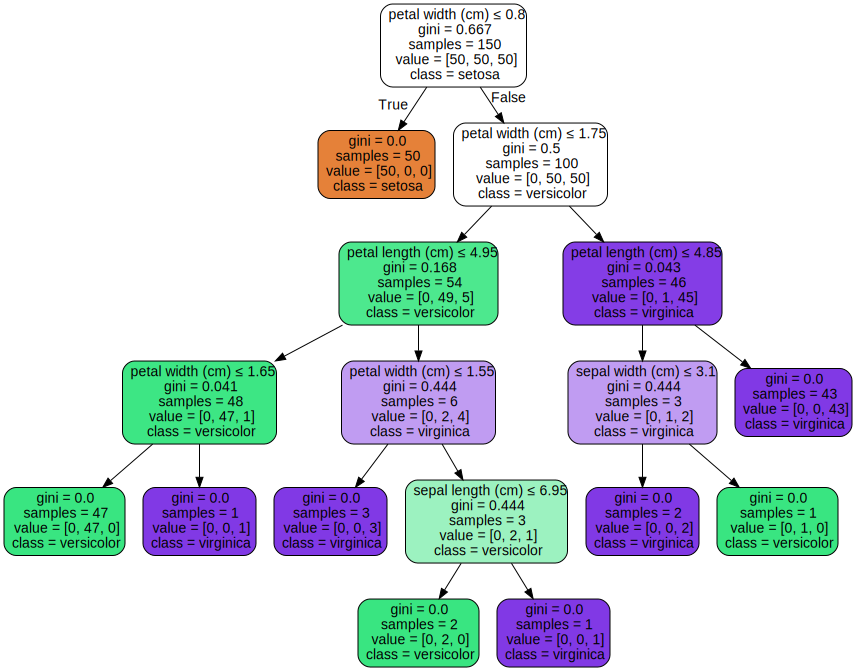

In [11]:
graph

In [12]:
# **Verinin Test ve Eğitim Verisi Olarak Bölünmesi**
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# **Eğitim Verisi Kullanılarak Karar Ağacı Modelinin Oluşturulması**
dt_clf2 = tree.DecisionTreeClassifier()
dt_clf2 = dt_clf2.fit(X_train, y_train)

In [16]:

# **Test Verisi Kullanılarak Modelin Doğruluğunun Ölçülmesi**
from sklearn.metrics import accuracy_score

In [17]:
y_pred = dt_clf2.predict(X_test)
accuracy_score(y_test, y_pred)  # Modelin doğruluk oranını hesaplar

1.0

In [19]:
# **Karışıklık Matrisi Değerleri**
from sklearn import metrics

In [20]:
metrics.confusion_matrix(y_test, y_pred)  # Modelin karışıklık matrisini oluşturur


array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [21]:
# **Karışıklık Matrisi Değerleri**
from sklearn import metrics

metrics.confusion_matrix(y_test, y_pred)  # Modelin karışıklık matrisini oluşturur

# **Tahmin Yapma**
deneme1 = [[5.1, 3.5, 1.4, 0.2]]
sonuc1 = dt_clf2.predict(deneme1)
print(sonuc1)

deneme2 = [[7.0, 3.2, 4.7, 1.4]]
sonuc2 = dt_clf2.predict(deneme2)
print(sonuc2)

deneme3 = [[6.5, 3.0, 5.8, 2.2]]
sonuc3 = dt_clf2.predict(deneme3)
print(sonuc3)

deneme4 = [[6.8, 3.1, 4.6, 1.8]]
sonuc4 = dt_clf2.predict(deneme4)
print(sonuc4)


[0]
[1]
[2]
[2]
